<a href="https://colab.research.google.com/github/DeepLearningSaeid/Grad/blob/main/Chapter_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This code installs the Autokeras library and imports the required libraries.
#  Autokeras is an open-source library that uses Bayesian optimization and reinforcement learning to optimize machine learning models. 
#  The timeit library is used to measure the execution time of code snippets. The numpy library is used for scientific computing with Python. 
#  The train_test_split function from sklearn.model_selection is used to split the dataset into training and test sets. 
#  The matplotlib library is used for data visualization. 
#  The Model, Sequential, Input, Embedding, Dense, concatenate, Dropout, Flatten, and Activation classes from the keras.layers module 
#  are used to define the architecture of a neural network. The backend module from keras is used to access the functions from the backend (e.g., TensorFlow). 
#  The get_custom_objects function from keras.utils.generic_utils is used to register custom objects for serialization and deserialization. 
#  The np_utils, to_categorical, and plot_model functions from keras.utils 
#  are used for data preprocessing, creating a categorical representation of data, and visualizing the model architecture. 
#  The random seed is set to 110 to ensure reproducibility of results.

# Install Autokeras library
!pip install autokeras

# Import required libraries
import autokeras as ak
import timeit
import numpy as np
import tensorflow as tf
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import Model, Sequential
from keras.layers import Input, Embedding, Dense, concatenate, Dropout, Flatten, Activation
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects
from keras.utils import np_utils, to_categorical, plot_model
from tensorflow.keras.optimizers import Adam
from keras.datasets import mnist


# Set random seed
np.random.seed(110)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.4/162.4 KB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 KB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 39.1 MB/s eta 0:00:00


In [2]:
# This code defines a number of custom activation functions that can be used in a Keras model. 
# The get_custom_objects function is used to retrieve a dictionary mapping names to custom objects (such as functions),
# and the update function is used to add the custom activation functions to this dictionary.

# Here is a brief description of each function:

#     x_1: This function raises the input to the power of 1, which is equivalent to returning the input as is.
#     x_2: This function returns the square of the input divided by 2.
#     x_2_: This function returns the square of the input divided by 24.
#     x_2__: This function returns the square of the input divided by 720.
#     x_2___: This function returns the square of the input divided by 40320.

# After these functions are defined, they can be used as activation functions in a Keras model 
# by using the names 'X_1', 'X_2', 'X_2_', 'X_2__', and 'X_2___', respectively. 
# For example, to use the x_2 function as an activation, you would use Dense(hidden_dimention, activation='X_2').

#Define custom activation functions

def x_1(x):
# """Returns x^1"""
  return K.pow(x, 1)
  
# Register x_1 as a custom activation function
get_custom_objects().update({'X_1': Activation(x_1)})

def x_2(x):
# """Returns (x^2)/2"""
  return (K.pow(x, 2)) / 2

# Register x_2 as a custom activation function
get_custom_objects().update({'X_2': Activation(x_2)})

def x_2_(x):
# """Returns (x^2)/24"""
  return (K.pow(x, 2)) / 24

# Register x_2_ as a custom activation function
get_custom_objects().update({'X_2_': Activation(x_2_)})

def x_2__(x):
# """Returns (x^2)/720"""
  return (K.pow(x, 2)) / 720

# Register x_2__ as a custom activation function
get_custom_objects().update({'X_2__': Activation(x_2__)})

def x_2___(x):
# """Returns (x^2)/40320"""
  return (K.pow(x, 2)) / 40320

# Register x_2___ as a custom activation function
get_custom_objects().update({'X_2___': Activation(x_2___)})

In [3]:
# This code defines a number of functions that can be used for testing purposes. Here is a brief description of each function:

#     power_: This function raises the input to the power of a specified number.
#     sigmoid_array: This function applies the sigmoid function element-wise to the input array.
#     exp_: This function applies the exponential function element-wise to the input array.
#     log_: This function applies the natural logarithm element-wise to the input array.
#     generate_random: This function generates a 2D array of random numbers between 0.01 and 0.99.
#     fun_1: This function returns a combination of the square of the input and the sigmoid of the input.
#     fun_2: This function returns a combination of the fifth power of the input, the sigmoid of the input, the exponential of the input, and the natural 
#      logarithm of the input.
#     fun_3: This function returns a combination of the 20th power of the input, the sigmoid of the input, the exponential of the input, 
#      and the natural logarithm of the input.


def power_(x, n):
    return np.power(x, n)

def sigmoid_array(x):
    return 1 / (1 + np.exp(-x))

def exp_(x):
    return np.exp(x)

def log_(x):
    return np.log(x)

def generate_random(shape_1, shape_2):
    temp = np.random.random(shape_1 * shape_2)
    temp = np.random.uniform(low=0.01, high=0.99, size=(shape_1 * shape_2))
    temp1 = temp.reshape(shape_1, shape_2)
    return temp1

def fun_1(x):
    return 1 / 2 * power_(x, 2) - 5 * sigmoid_array(x)

def fun_2(x):
    return 6 * power_(x, 5) - 3 * sigmoid_array(x) + exp_(x) - 9 * log_(x)

def fun_3(x):
    return 22 * power_(x, 20) + sigmoid_array(x) + 2 * exp_(x) + 5 * log_(x)


In [4]:
# This code defines a function plot_loss that creates a single plot with six subplots.
#  Each subplot visualizes the training and test loss for a particular model architecture over the number of epochs.
#  The function takes in the following arguments:

#     size: The maximum value for the y-axis of all subplots.
#     in_1, in_2, ..., in_6: The History objects for the six model architectures.
#     title: The title for each subplot.

# The function first defines a helper function plot_subplot that takes in a subplot number, a History object, and a title,
# and creates a single subplot with the training and test loss for that model architecture. 
# The plot_loss function then calls plot_subplot for each of the six model architectures.

def plot_loss(size, in_1, in_2, in_3, in_4, in_5):
    # Set font size for all subplots
    plt.rcParams.update({'font.size': 12})
    
    def plot_subplot(subplot_num, history, title):
        # Extract training and test loss from history object
        training_loss = history.history['loss']
        test_loss = history.history['val_loss']
        
        # Create list of epochs
        epoch_count = range(1, len(training_loss) + 1)
        
        # Create subplot and plot training and test loss
        plt.subplot(subplot_num)
        plt.plot(epoch_count, training_loss, 'r--')
        plt.plot(epoch_count, test_loss, 'b-')
        
        # Add legend and labels
        plt.legend(['Training Loss', 'Test Loss'])
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        
        # Set y-axis limit
        plt.ylim(0, size)
        
        # Add title to subplot
        plt.title(title)
    
    # Create figure with 6 subplots
    plt.figure(figsize=(20, 12))
    
    # Plot training and test loss for each model architecture
    plot_subplot(231, in_1, 'Architecture 1')
    plot_subplot(232, in_2, 'Architecture 2')
    plot_subplot(233, in_3, 'Auto_Keras ')
    plot_subplot(234, in_4, 'Random Search')
    plot_subplot(235, in_5, 'SWAG')


In [5]:
# This function plots the shapes of the input test functions on six subplots. 
# It takes six inputs, each of which is an array containing three arrays. 
# The first array of each input contains the input values of the test function,
#  the second array contains the output values of the test function, 
#  and the third array contains the predicted output values of the test function. 
#  The subplots are arranged in a 2x3 grid and the shapes of the test functions are plotted on each subplot using the scatter function. 
#  The title function is used to label each subplot with the name of the architecture being plotted. 
#  The subplots_adjust function is used to adjust the spacing between subplots. Finally, the show function is used to display the plots.


def plot_shape(in_1,in_2,in_3,in_4,in_5):
    # Set up the plot with a figure size of (20,10)
    plt.figure(figsize=(20,10))
    # Update the font size of the plot to 16
    plt.rcParams.update({'font.size': 16})

    # Plot the first subplot with the input data
    plt.subplot(231)
    plt.scatter(in_1[0], in_1[1])
    plt.scatter(in_1[0], in_1[2])
    plt.title('Architure 1')

    # Plot the second subplot with the input data
    plt.subplot(232)
    plt.scatter(in_2[0], in_2[1])
    plt.scatter(in_2[0], in_2[2])
    plt.title('Architure 2')

    # Plot the third subplot with the input data
    plt.subplot(233)
    plt.scatter(in_3[0], in_3[1])
    plt.scatter(in_3[0], in_3[2])
    plt.title('Auto Keras')

    # Plot the fourth subplot with the input data
    plt.subplot(234)
    plt.scatter(in_4[0], in_4[1])
    plt.scatter(in_4[0], in_4[2])
    plt.title('Random Search')
    
    # Plot the fifth subplot with the input data
    plt.subplot(235)
    plt.scatter(in_5[0], in_5[1])
    plt.scatter(in_5[0], in_5[2])
    plt.title('SWAG')    
    

    # Adjust the subplot layout
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.0010, right=0.95, hspace=0.3, wspace=0.18)

    # Show the plot
    plt.show()


In [6]:
# The function plot_ takes a Keras model's training history as input and plots the training loss and test loss over the number of epochs.
#  It uses matplotlib to create the plot and displays it to the user. 
#  The x-axis represents the epoch count, the y-axis represents the loss value, and the training loss is plotted in red with a dashed line and 
#  the test loss is plotted in blue with a solid line. The legend labels the two curves as "Training Loss" and "Test Loss",
#   and the x-axis and y-axis are labeled as "Epoch" and "Loss" respectively. The plot is then displayed to the user using the show function.
def plot_(history):
    # Retrieve the training and test loss values
    training_loss = history.history['loss']
    test_loss = history.history['val_loss']

    # Generate epoch count
    epoch_count = range(1, len(training_loss) + 1)

    # Plot the training and test loss
    plt.plot(epoch_count, training_loss, 'r--')
    plt.plot(epoch_count, test_loss, 'b-')
    plt.legend(['Training Loss', 'Test Loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()


In [7]:
# The function visualize_result takes in a history object, X test data, Y test data, and a model. 
# It first calls the plot_ function to plot the training and test loss over the epochs. 
# It then plots the X test data against the Y test data as a scatter plot. 
# It then generates predictions for the X test data using the model, and plots those predictions against the X test data as a scatter plot.
def visualize_result(history,X_test, Y_test,model):
  # Plot the loss curve
  plot_(history)
  # Scatter plot of the true test data
  plt.scatter(X_test, Y_test)
  # Scatter plot of the model's predicted output
  predict=model.predict(X_test)
  plt.scatter(X_test, predict)
  plt.show()

In [8]:
#Creates dataset
dim_train=1000
dim_test=200

X=generate_random(dim_train,3)
Y=generate_random(dim_train,3)
    
Y[:,0]=fun_1(X[:,0])
Y[:,1]=fun_2(X[:,1])
Y[:,2]=fun_3(X[:,2])
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1234)

def data_prep(x_train,x_test,y_train,y_test,column):
  X_train=x_train[:,column]
  Y_train=y_train[:,column]
  X_test=x_test[:,column]
  Y_test=y_test[:,column]
  return X_train,Y_train,X_test,Y_test

In [9]:
# This is a Python function called "model_training_visualization" that takes in several inputs:

# model_input: a pre-defined machine learning model
# X_train_1: the input training data
# Y_train_1: the output training data
# X_test_1: the input testing data
# Y_test_1: the output testing data
# number_epo_1: the number of epochs to train the model
# batch_size_: the batch size used during training
# The function performs several actions:

# It uses the timeit library to measure the runtime of the model training process, which starts with the model_input.fit() method and ends after the print("Run Time : %f" % (end - start)) statement
# It makes predictions using the model_input.predict() method on the X_test_1 input data and saves the predictions in the predict variable
# It calls another function called visualize_result() to visualize the results of the model training process. This function likely takes in the training history, testing data, and the model as input.
# It returns a list containing the X_test_1, Y_test_1, predict and history variables
# In summary, the function trains a machine learning model, measures the runtime, makes predictions on a test set, visualizes the results, and returns some output variables.




def model_training_visualization(model_input,X_train_1,Y_train_1,X_test_1,Y_test_1,number_epo_1,batch_size_):
  # Train model
  start = timeit.default_timer()
  history = model_input.fit(X_train_1, Y_train_1, epochs=number_epo, verbose=0, batch_size=batch_size_,
                          validation_data=(X_test_1, Y_test_1))
  end = timeit.default_timer()
  print("Run Time : %f" % (end - start))

  # Make predictions and visualize results
  predict = model_input.predict(X_test_1)
  visualize_result(history, X_test_1, Y_test_1, model_input)
  return [X_test_1, Y_test_1, predict, history]

In [10]:
# Hyper perameters
number_epo=50
input_dim=1
output_dim=1

In [11]:
# This code defines a function called "SWAG()" which creates a neural network model using the Keras library in TensorFlow. 
# The function starts by defining a variable hidden_dimention with the value of 50.

# The function then creates an initializer for the weight and bias of the layers using tf.keras.initializers.RandomNormal with mean 0.1, standard deviation 0.05.

# The function then defines a sequential model using the Sequential() method from the Keras library. It also defines an input layer with shape (input_dim,).

# The function then creates two sets of layers, the first set of layers are created with two dense layers layer_1_x_1 and layer_1_x_2 with 
# the same number of hidden dimensions and activation functions 'X_1' and 'X_2' respectively.
#  The function then concatenates these two layers together using concatenate() method.

# The second set of layers are created with three dense layers layer_x_3_x_4, layer_x_5_x_6 and layer_x_7_x_8 with the same number of hidden dimensions 
# and activation functions 'X_2_','X_2__' and 'X_2___' respectively. The function then concatenates all the layers from the two sets of layers together 
# using concatenate() method.

# The function then creates an output layer with one dense layer out_put_first_layer with the same number of hidden dimensions and activation function 
# 'linear', and another dense layer out_put with the output dimension and activation function 'linear'

# Finally, the function creates the model using the Model() method and compiles it using the Adam optimizer with a learning rate of 0.001, 
# and the loss function set to mean squared error (MSE) using the compile() method. It then returns the created model.


hidden_dimention = 50

def SWAG():
  int_=tf.keras.initializers.RandomNormal(mean=0.1, stddev=0.05, seed=None)

  # Model definition
  model = Sequential()
  in_ = Input(shape=(input_dim,))

  # First set of layers
  layer_1_x_1 = Dense(hidden_dimention,kernel_initializer=int_,bias_initializer=int_ , activation='X_1')(in_)
  layer_1_x_2 = Dense(hidden_dimention,kernel_initializer=int_,bias_initializer=int_ , activation='X_2')(in_)
  concatenate_first_layer = concatenate([layer_1_x_1, layer_1_x_2])

  # Second set of layers
  layer_x_3_x_4 = Dense(hidden_dimention,kernel_initializer=int_,bias_initializer=int_ , activation='X_2_')(concatenate_first_layer)
  layer_x_5_x_6 = Dense(hidden_dimention,kernel_initializer=int_,bias_initializer=int_ , activation='X_2__')(layer_x_3_x_4)
  layer_x_7_x_8 = Dense(hidden_dimention,kernel_initializer=int_,bias_initializer=int_ , activation='X_2___')(layer_x_5_x_6)

  # Concatenate the two sets of layers
  concatenate_second_layer = concatenate([layer_1_x_1, layer_1_x_2, concatenate_first_layer,
                                          layer_x_3_x_4, layer_x_5_x_6, layer_x_7_x_8])

  # Output layer
  out_put_first_layer = Dense(hidden_dimention,kernel_initializer=int_,bias_initializer=int_ , activation='linear')(concatenate_second_layer)
  out_put = Dense(output_dim, activation='linear')(out_put_first_layer)

  # Create model
  Our_model = Model(in_ , out_put)
  optimizer =Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
  Our_model.compile(loss='mean_squared_error', optimizer=optimizer)
  return Our_model
Our_model=SWAG()

Run Time : 14.156016
7/7 [==============================] - 0s 2ms/step


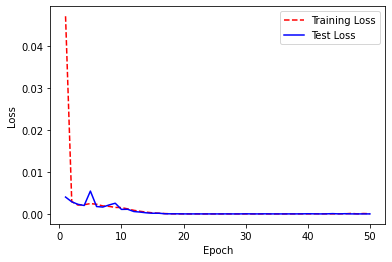

7/7 [==============================] - 0s 2ms/step


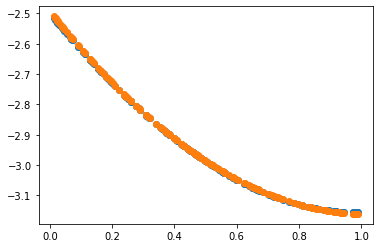

Run Time : 9.626382
7/7 [==============================] - 0s 2ms/step


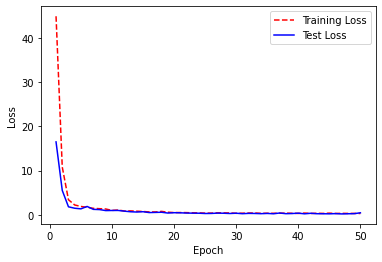

7/7 [==============================] - 0s 2ms/step


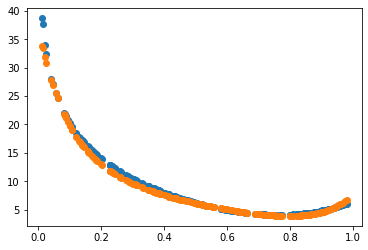

Run Time : 9.678616
7/7 [==============================] - 0s 4ms/step


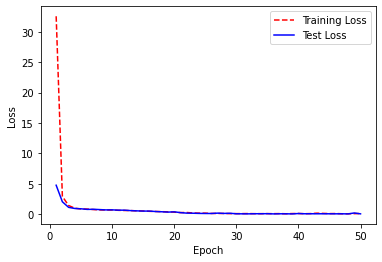

7/7 [==============================] - 0s 2ms/step


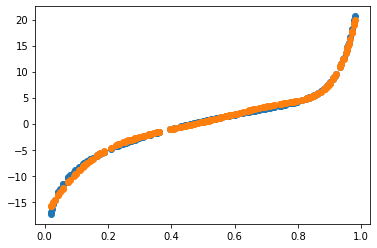

In [12]:
# this code is preparing data, training a model, and then visualizing the results of the model's performance. 
# The data preparation includes reshaping the data into the correct shape for the model and selecting a particular column of the data to use. 
# The model is then trained on this data for a specified number of epochs, and the time it takes to train the model is recorded.
# Finally, the model is used to make predictions on the test set, and the results are visualized.
#   The results of the model's performance, including the test data and predictions, are stored in the F_1_our_model variable.

# Preprocess data
column = 0
X_train, Y_train, X_test, Y_test = data_prep(x_train, x_test, y_train, y_test, column)

# Reshape data
X_train = X_train.reshape(800, 1)
Y_train = Y_train.reshape(800, 1)
X_test = X_test.reshape(200, 1)
Y_test = Y_test.reshape(200, 1)

# # Train model
F_1_our_model = model_training_visualization(Our_model,X_train,Y_train,X_test,Y_test,number_epo,10)


# Preprocess data
column = 1
X_train, Y_train, X_test, Y_test = data_prep(x_train, x_test, y_train, y_test, column)

# Reshape data
X_train = X_train.reshape(800, 1)
Y_train = Y_train.reshape(800, 1)
X_test = X_test.reshape(200, 1)
Y_test = Y_test.reshape(200, 1)

# Train model

F_2_our_model = model_training_visualization(Our_model,X_train,Y_train,X_test,Y_test,number_epo,10)


# Preprocess data
column = 2
X_train, Y_train, X_test, Y_test = data_prep(x_train, x_test, y_train, y_test, column)

# Reshape data
X_train = X_train.reshape(800, 1)
Y_train = Y_train.reshape(800, 1)
X_test = X_test.reshape(200, 1)
Y_test = Y_test.reshape(200, 1)

# Train model

F_3_our_model = model_training_visualization(Our_model,X_train,Y_train,X_test,Y_test,number_epo,10)

In [13]:
#Second Traditional model for Function 3
archicture_1 = Sequential()
archicture_1.add(Dense(5, input_dim=input_dim, activation='relu'))
archicture_1.add(Dense(10, activation='relu'))
archicture_1.add(Dense(50, activation='tanh'))
archicture_1.add(Dense(18, activation='relu'))
archicture_1.add(Dense(15, activation='tanh'))
archicture_1.add(Dense(18, activation='sigmoid'))
archicture_1.add(Dropout(0.2))
archicture_1.add(Dense(8, activation='relu'))
archicture_1.add(Dropout(0.2))
archicture_1.add(Dense(output_dim, activation='relu'))
#model.summary()
archicture_1.compile(loss='mean_squared_error', optimizer='adam')

Run Time : 10.655284
7/7 [==============================] - 0s 2ms/step


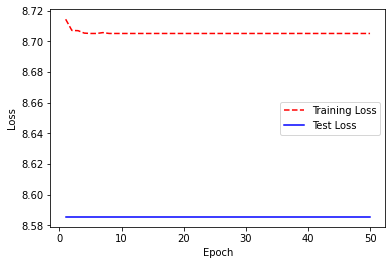

7/7 [==============================] - 0s 2ms/step


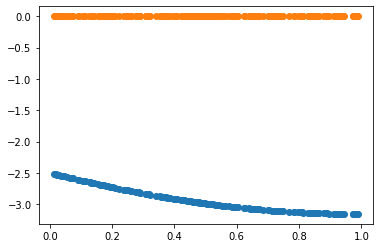

Run Time : 9.758687
7/7 [==============================] - 0s 2ms/step


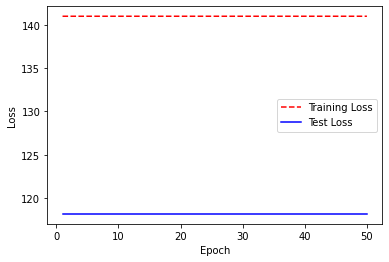

7/7 [==============================] - 0s 2ms/step


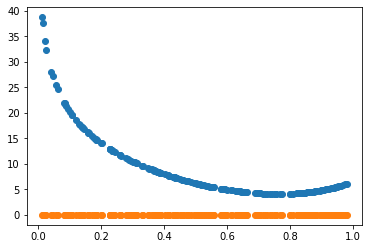

Run Time : 9.766622
7/7 [==============================] - 0s 2ms/step


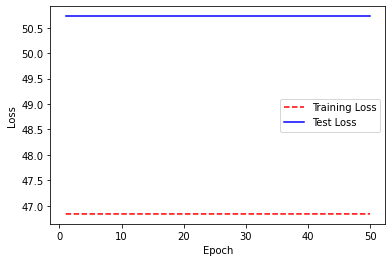

7/7 [==============================] - 0s 2ms/step


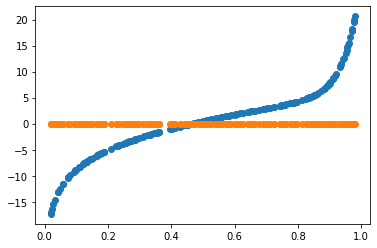

In [14]:
column = 0
X_train, Y_train, X_test, Y_test = data_prep(x_train, x_test, y_train, y_test, column)

# Reshape data
X_train = X_train.reshape(800, 1)
Y_train = Y_train.reshape(800, 1)
X_test = X_test.reshape(200, 1)
Y_test = Y_test.reshape(200, 1)

# # Train model
F_1_archicture_1 = model_training_visualization(archicture_1,X_train,Y_train,X_test,Y_test,number_epo,10)

column = 1
X_train, Y_train, X_test, Y_test = data_prep(x_train, x_test, y_train, y_test, column)

# Reshape data
X_train = X_train.reshape(800, 1)
Y_train = Y_train.reshape(800, 1)
X_test = X_test.reshape(200, 1)
Y_test = Y_test.reshape(200, 1)

# # Train model
F_2_archicture_1 = model_training_visualization(archicture_1,X_train,Y_train,X_test,Y_test,number_epo,10)

column = 2
X_train, Y_train, X_test, Y_test = data_prep(x_train, x_test, y_train, y_test, column)

# Reshape data
X_train = X_train.reshape(800, 1)
Y_train = Y_train.reshape(800, 1)
X_test = X_test.reshape(200, 1)
Y_test = Y_test.reshape(200, 1)

# # Train model
F_3_archicture_1 = model_training_visualization(archicture_1,X_train,Y_train,X_test,Y_test,number_epo,10)

In [15]:
#Fifth Traditional Model
archicture_2 = Sequential()
archicture_2.add(Dense(5, input_dim=input_dim, activation='softplus'))
archicture_2.add(Dense(10, activation='softplus'))
archicture_2.add(Dense(20, activation='tanh'))
archicture_2.add(Dense(15, activation='relu'))
archicture_2.add(Dense(25, activation='tanh'))
archicture_2.add(Dense(20, activation='sigmoid'))
archicture_2.add(Dense(25, activation='relu'))
archicture_2.add(Dense(output_dim, activation='softplus'))
archicture_2.add(Dropout(0.2))
archicture_2.compile(loss='mean_squared_error', optimizer='adam')

Run Time : 10.194769
7/7 [==============================] - 0s 2ms/step


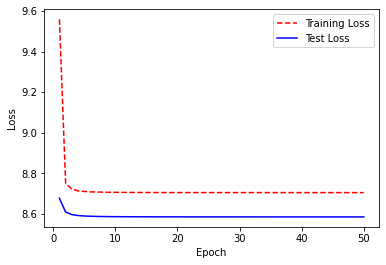

7/7 [==============================] - 0s 2ms/step


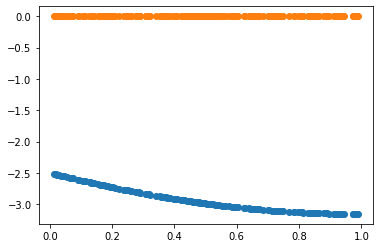

Run Time : 9.661434
7/7 [==============================] - 0s 2ms/step


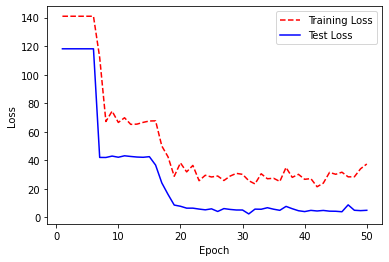

7/7 [==============================] - 0s 2ms/step


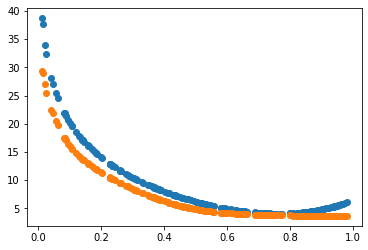

Run Time : 9.636861
7/7 [==============================] - 0s 2ms/step


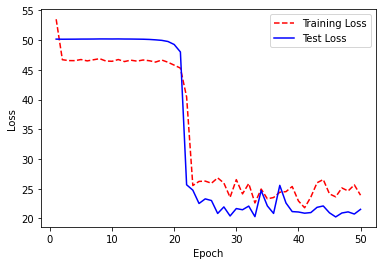

7/7 [==============================] - 0s 2ms/step


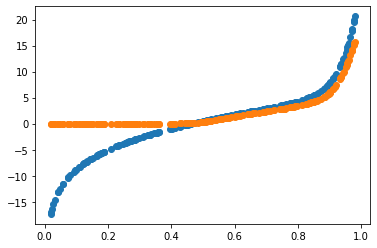

In [16]:
column = 0
X_train, Y_train, X_test, Y_test = data_prep(x_train, x_test, y_train, y_test, column)

# Reshape data
X_train = X_train.reshape(800, 1)
Y_train = Y_train.reshape(800, 1)
X_test = X_test.reshape(200, 1)
Y_test = Y_test.reshape(200, 1)

# # Train model
F_1_archicture_2 = model_training_visualization(archicture_2,X_train,Y_train,X_test,Y_test,number_epo,10)

column = 1
X_train, Y_train, X_test, Y_test = data_prep(x_train, x_test, y_train, y_test, column)

# Reshape data
X_train = X_train.reshape(800, 1)
Y_train = Y_train.reshape(800, 1)
X_test = X_test.reshape(200, 1)
Y_test = Y_test.reshape(200, 1)

# # Train model
F_2_archicture_2 = model_training_visualization(archicture_2,X_train,Y_train,X_test,Y_test,number_epo,10)

column = 2
X_train, Y_train, X_test, Y_test = data_prep(x_train, x_test, y_train, y_test, column)

# Reshape data
X_train = X_train.reshape(800, 1)
Y_train = Y_train.reshape(800, 1)
X_test = X_test.reshape(200, 1)
Y_test = Y_test.reshape(200, 1)

# # Train model
F_3_archicture_2 = model_training_visualization(archicture_2,X_train,Y_train,X_test,Y_test,number_epo,10)

Epoch 1/5
25/25 [==============================] - 0s 3ms/step - loss: 117.4082 - mean_squared_error: 117.4082
Epoch 2/5
25/25 [==============================] - 0s 3ms/step - loss: 39.1799 - mean_squared_error: 39.1799
Epoch 3/5
25/25 [==============================] - 0s 3ms/step - loss: 6.7858 - mean_squared_error: 6.7858
Epoch 4/5
25/25 [==============================] - 0s 3ms/step - loss: 5.9439 - mean_squared_error: 5.9439
Epoch 5/5
25/25 [==============================] - 0s 3ms/step - loss: 5.6225 - mean_squared_error: 5.6225
Run Time : 9.006036
7/7 [==============================] - 0s 2ms/step


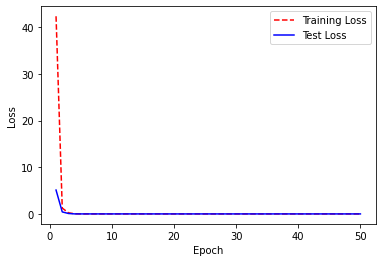

7/7 [==============================] - 0s 2ms/step


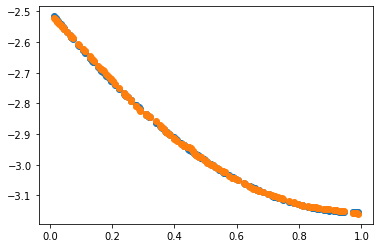

Run Time : 8.529958
7/7 [==============================] - 0s 2ms/step


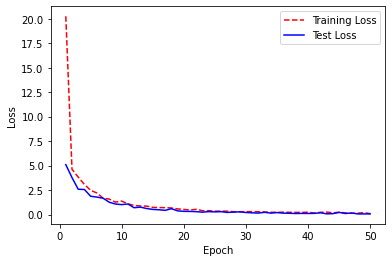

7/7 [==============================] - 0s 2ms/step


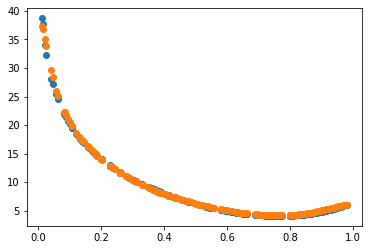

Run Time : 8.543310
7/7 [==============================] - 0s 2ms/step


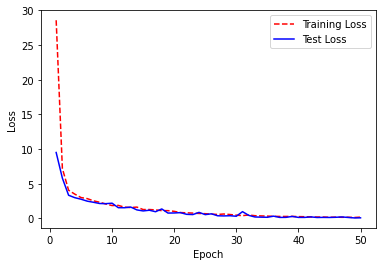

7/7 [==============================] - 0s 2ms/step


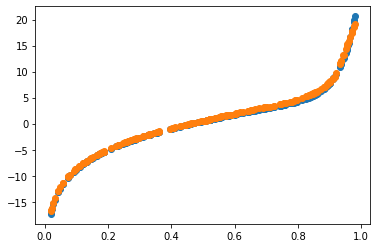

In [17]:
column = 1
X_train, Y_train, X_test, Y_test = data_prep(x_train, x_test, y_train, y_test, column)

# Reshape data
X_train = X_train.reshape(800, 1)
Y_train = Y_train.reshape(800, 1)
X_test = X_test.reshape(200, 1)
Y_test = Y_test.reshape(200, 1)

train_set = tf.data.Dataset.from_tensor_slices((X_train, Y_train))
test_set = tf.data.Dataset.from_tensor_slices(
    (X_test, Y_test)
)

clf = ak.StructuredDataRegressor(
    overwrite=True, max_trials=10
) 
# Feed the tensorflow Dataset to the classifier.
clf.fit(train_set, epochs=5,verbose=0)
autokeras_model=clf.export_model()


column = 0
X_train, Y_train, X_test, Y_test = data_prep(x_train, x_test, y_train, y_test, column)

# Reshape data
X_train = X_train.reshape(800, 1)
Y_train = Y_train.reshape(800, 1)
X_test = X_test.reshape(200, 1)
Y_test = Y_test.reshape(200, 1)

# # Train model
F_1_autokeras = model_training_visualization(autokeras_model,X_train,Y_train,X_test,Y_test,number_epo,10)

column = 1
X_train, Y_train, X_test, Y_test = data_prep(x_train, x_test, y_train, y_test, column)

# Reshape data
X_train = X_train.reshape(800, 1)
Y_train = Y_train.reshape(800, 1)
X_test = X_test.reshape(200, 1)
Y_test = Y_test.reshape(200, 1)

# # Train model
F_2_autokeras = model_training_visualization(autokeras_model,X_train,Y_train,X_test,Y_test,number_epo,10)

column = 2
X_train, Y_train, X_test, Y_test = data_prep(x_train, x_test, y_train, y_test, column)

# Reshape data
X_train = X_train.reshape(800, 1)
Y_train = Y_train.reshape(800, 1)
X_test = X_test.reshape(200, 1)
Y_test = Y_test.reshape(200, 1)

# # Train model
F_3_autokeras = model_training_visualization(autokeras_model,X_train,Y_train,X_test,Y_test,number_epo,10)

In [18]:
# This code performs hyperparameter tuning using grid search cross-validation on a Keras neural network model for regression.
#  The model has three dense layers, with dropout and kernel initializers applied between each layer. 
#  The hyperparameters that are being tuned are the batch size, number of epochs, learning rate, dropout rate, activation functions, kernel initializers,
#   and number of neurons in each layer. The model is trained on the input data X_train and
#   the output data Y_train. The best hyperparameter combination is determined based on mean squared error,
#   which is used as the evaluation metric. The results of the grid search, including the best combination 
#   and the performance of all combinations, are printed to the console. The total runtime of the code is also printed.


def create_best_model(best_param):
    model = Sequential()
    model.add(
        Dense(
            best_param['neuron1'],
            input_dim=1,
            kernel_initializer=best_param['init'],
            activation=best_param['activation_function'],
        )
    )
    model.add(Dropout(best_param['dropout_rate']))
    model.add(
        Dense(
            best_param['neuron2'],
            input_dim=best_param['neuron1'],
            kernel_initializer=best_param['init'],
            activation=best_param['activation_function_1'],
        )
    )
    model.add(Dropout(best_param['dropout_rate']))
    model.add(Dense(1, activation=best_param['activation_function_2']))

    optimizer = tf.keras.optimizers.Adam(learning_rate=best_param['learning_rate'])
    model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=['mse'])
    return model

def create_model(
    learning_rate,
    dropout_rate,
    activation_function,
    activation_function_1,
    activation_function_2,
    init,
    neuron1,
    neuron2,
):
    model = Sequential()
    model.add(
        Dense(
            neuron1,
            input_dim=1,
            kernel_initializer=init,
            activation=activation_function,
        )
    )
    model.add(Dropout(dropout_rate))
    model.add(
        Dense(
            neuron2,
            input_dim=neuron1,
            kernel_initializer=init,
            activation=activation_function_1,
        )
    )
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation=activation_function_2))

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=['mse'])
    return model


# Create the model
model = KerasRegressor(build_fn=create_model, verbose=0)

# Define the grid search parameters
param_grids = {
    'batch_size': [10],
    'epochs': [10],
    'learning_rate': [0.01],
    'dropout_rate': [0.1],
    'activation_function': ['softmax', 'relu', 'tanh', 'linear'],
    'activation_function_1': ['softmax', 'relu', 'tanh', 'linear'],
    'activation_function_2': ['softmax', 'relu', 'tanh', 'linear'],
    'init': ['uniform'],
    'neuron1': [50, 100, 150],
    'neuron2': [20, 40, 80],
}

start = timeit.default_timer()

# Build and fit the GridSearchCV
kfold = KFold(n_splits=2)
grid = GridSearchCV(estimator=model, param_grid=param_grids, cv=kfold, verbose=0)
grid_result = grid.fit(X_train, Y_train)

# Summarize the results
print(f"Best score: {grid_result.best_score_}, using {grid_result.best_params_}")
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print(f"{mean}, {stdev} with: {param}")

# Print runtime
end = timeit.default_timer()
print("Run Time : %f" % (end-start))


<ipython-input-18-bfd3bda0665b>:73: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)


Best score: -1.8520472049713135, using {'activation_function': 'tanh', 'activation_function_1': 'relu', 'activation_function_2': 'linear', 'batch_size': 10, 'dropout_rate': 0.1, 'epochs': 10, 'init': 'uniform', 'learning_rate': 0.01, 'neuron1': 150, 'neuron2': 80}
-46.72833251953125, 4.958072662353516 with: {'activation_function': 'softmax', 'activation_function_1': 'softmax', 'activation_function_2': 'softmax', 'batch_size': 10, 'dropout_rate': 0.1, 'epochs': 10, 'init': 'uniform', 'learning_rate': 0.01, 'neuron1': 50, 'neuron2': 20}
-46.72833251953125, 4.958072662353516 with: {'activation_function': 'softmax', 'activation_function_1': 'softmax', 'activation_function_2': 'softmax', 'batch_size': 10, 'dropout_rate': 0.1, 'epochs': 10, 'init': 'uniform', 'learning_rate': 0.01, 'neuron1': 50, 'neuron2': 40}
-46.72833251953125, 4.958072662353516 with: {'activation_function': 'softmax', 'activation_function_1': 'softmax', 'activation_function_2': 'softmax', 'batch_size': 10, 'dropout_rate'

In [19]:
search_model=create_best_model(grid_result.best_params_)

Run Time : 8.453291
7/7 [==============================] - 0s 1ms/step


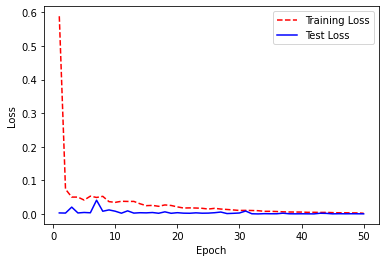

7/7 [==============================] - 0s 1ms/step


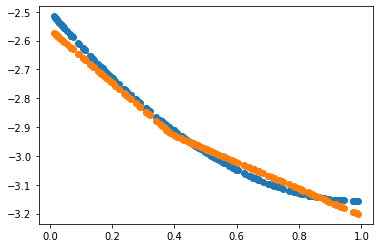

Run Time : 8.153842
7/7 [==============================] - 0s 2ms/step


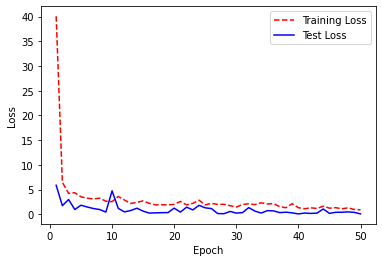

7/7 [==============================] - 0s 2ms/step


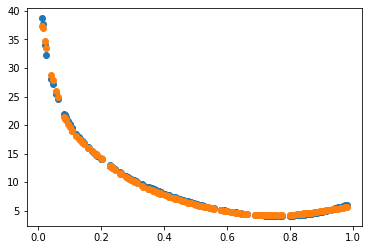

Run Time : 8.236404
7/7 [==============================] - 0s 1ms/step


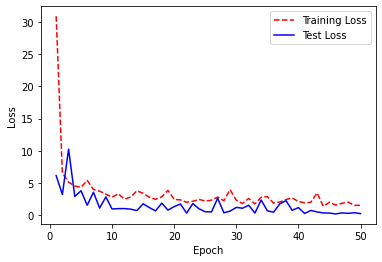

7/7 [==============================] - 0s 2ms/step


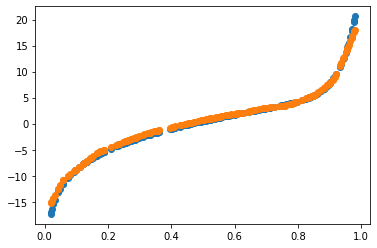

In [20]:



column = 0
X_train, Y_train, X_test, Y_test = data_prep(x_train, x_test, y_train, y_test, column)

# Reshape data
X_train = X_train.reshape(800, 1)
Y_train = Y_train.reshape(800, 1)
X_test = X_test.reshape(200, 1)
Y_test = Y_test.reshape(200, 1)

# # Train model
F_1_Search = model_training_visualization(search_model,X_train,Y_train,X_test,Y_test,number_epo,10)

column = 1
X_train, Y_train, X_test, Y_test = data_prep(x_train, x_test, y_train, y_test, column)

# Reshape data
X_train = X_train.reshape(800, 1)
Y_train = Y_train.reshape(800, 1)
X_test = X_test.reshape(200, 1)
Y_test = Y_test.reshape(200, 1)

# # Train model
F_2_Search = model_training_visualization(search_model,X_train,Y_train,X_test,Y_test,number_epo,10)

column = 2
X_train, Y_train, X_test, Y_test = data_prep(x_train, x_test, y_train, y_test, column)

# Reshape data
X_train = X_train.reshape(800, 1)
Y_train = Y_train.reshape(800, 1)
X_test = X_test.reshape(200, 1)
Y_test = Y_test.reshape(200, 1)

# # Train model
F_3_Search = model_training_visualization(search_model,X_train,Y_train,X_test,Y_test,number_epo,10)

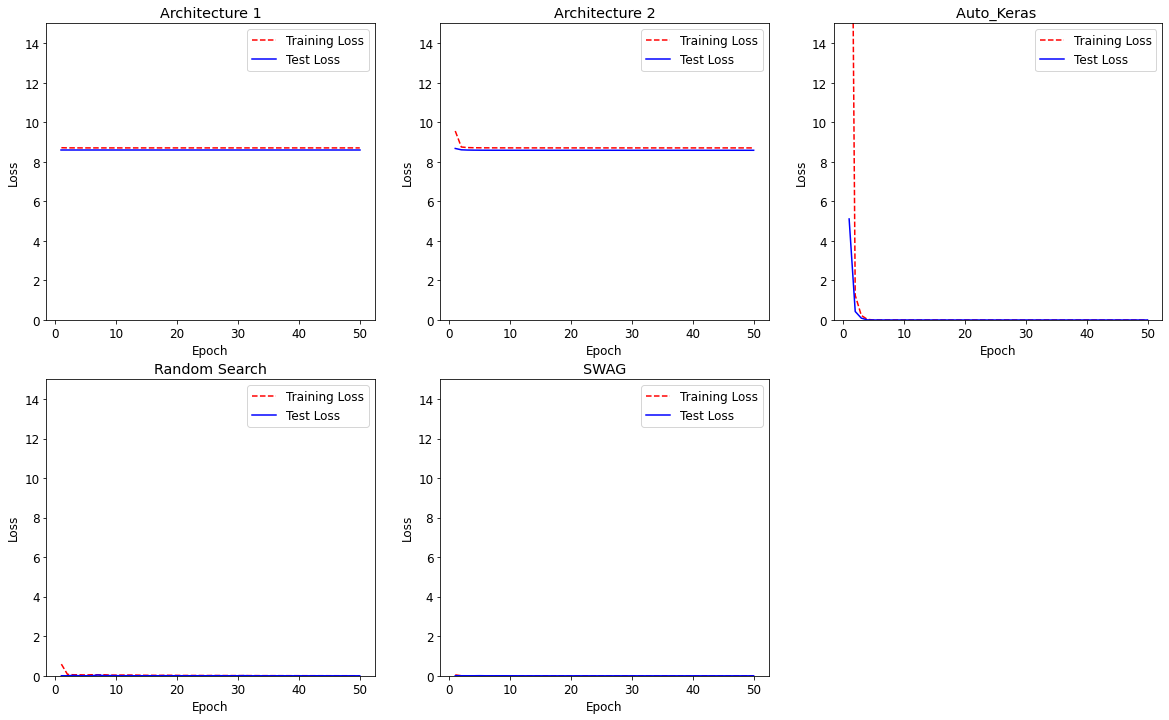

In [21]:
#Plots Losses
plot_loss(15,F_1_archicture_1[3],F_1_archicture_2[3],F_1_autokeras[3],F_1_Search[3],F_1_our_model[3],)

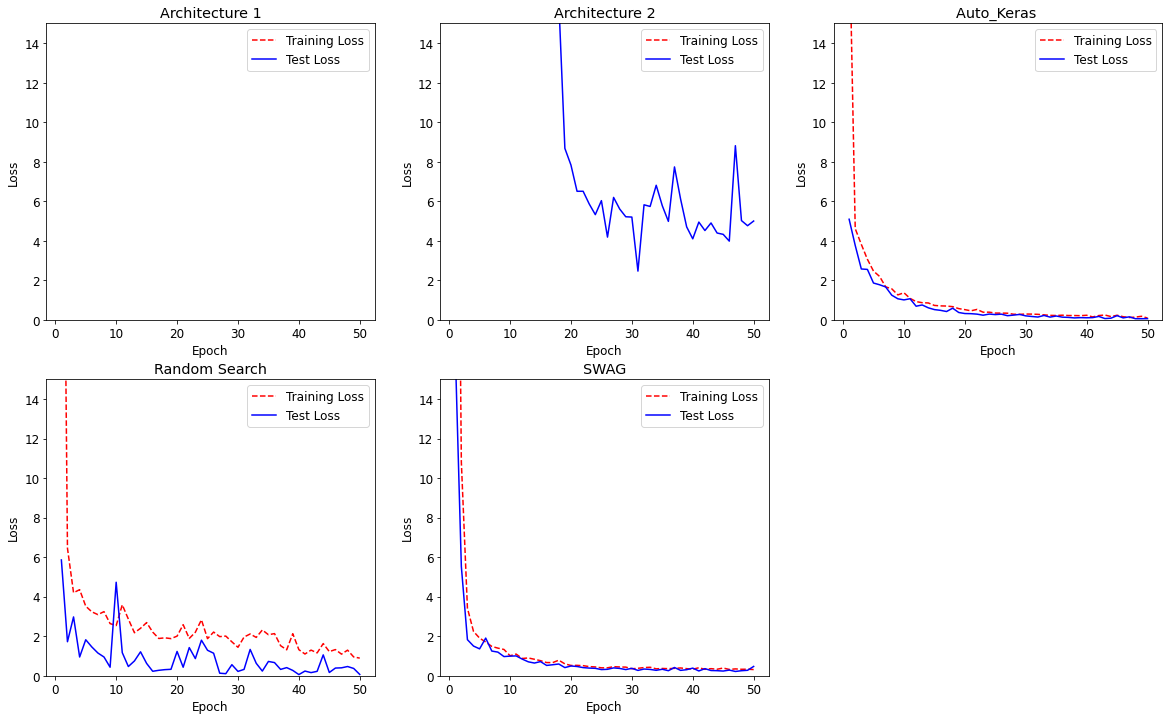

In [22]:
#Plot Losses
plot_loss(15,F_2_archicture_1[3],F_2_archicture_2[3],F_2_autokeras[3],F_2_Search[3],F_2_our_model[3],)

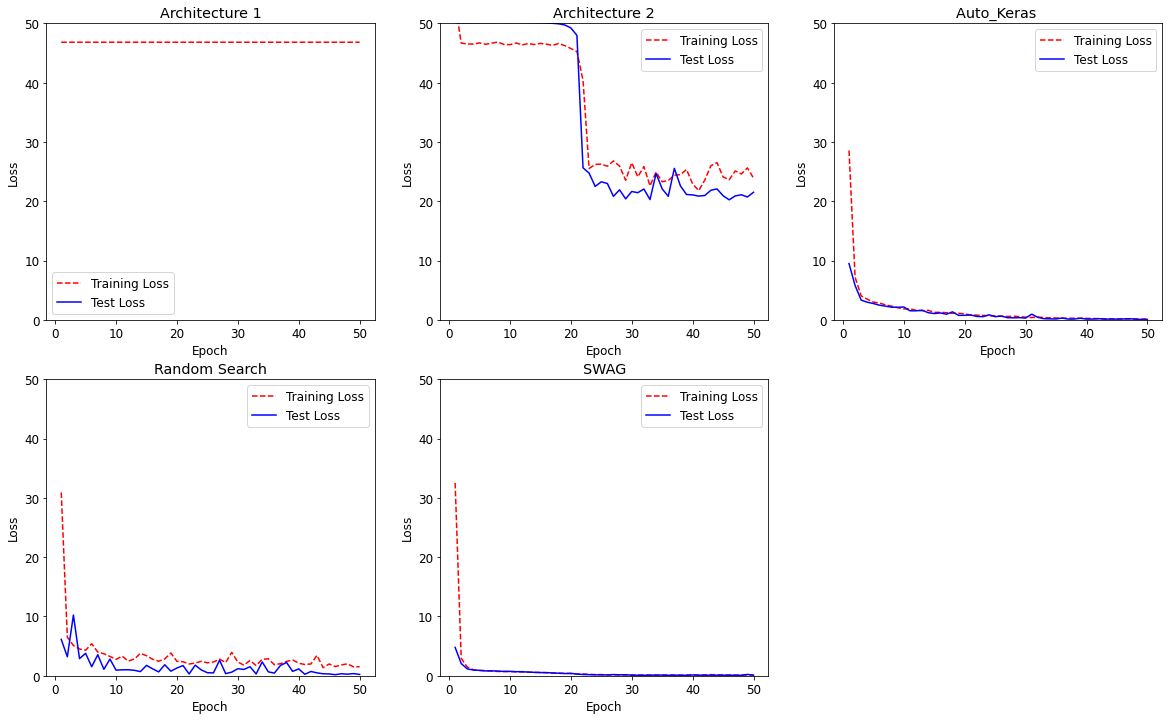

In [23]:
#Plot Losses
plot_loss(50,F_3_archicture_1[3],F_3_archicture_2[3],F_3_autokeras[3],F_3_Search[3],F_3_our_model[3],)

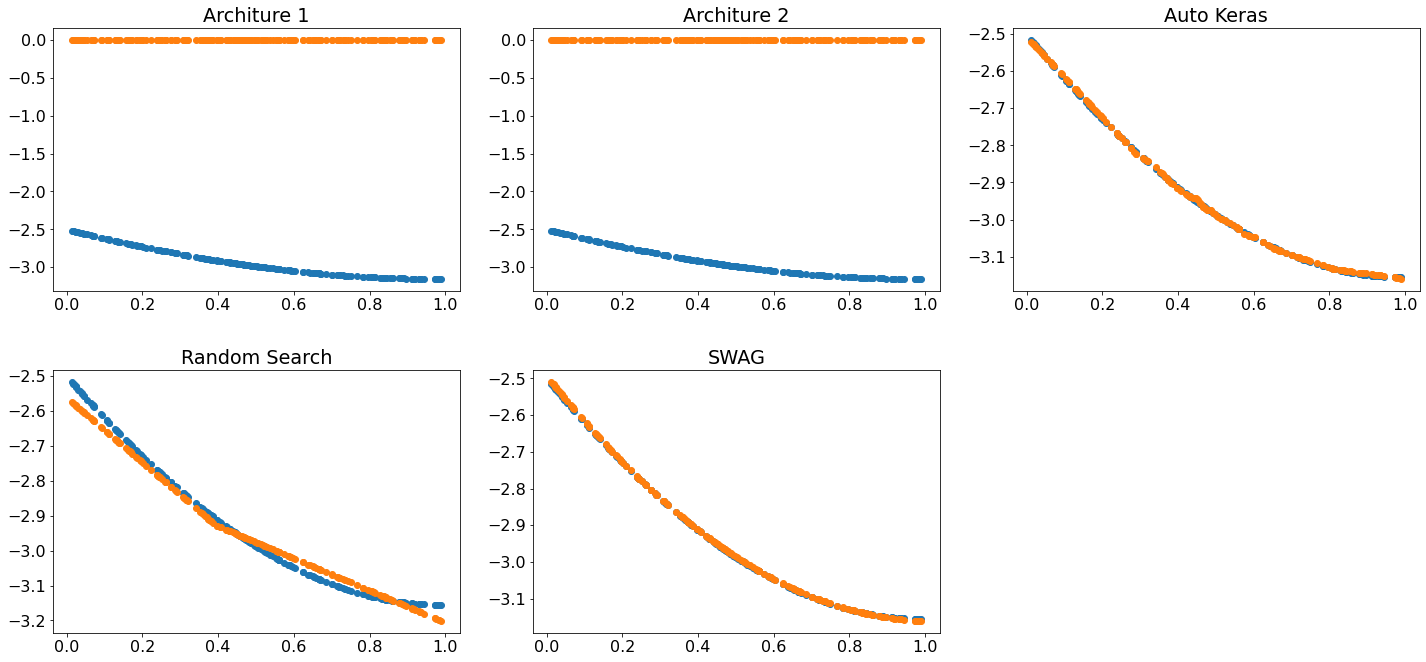

In [24]:
#Plots Shapes
plot_shape(F_1_archicture_1,F_1_archicture_2,F_1_autokeras,F_1_Search,F_1_our_model,)

# plot_loss(15,F_1_archicture_1[3],F_1_archicture_2[3],F_1_autokeras[3],F_1_Search[3],F_1_our_model[3],)

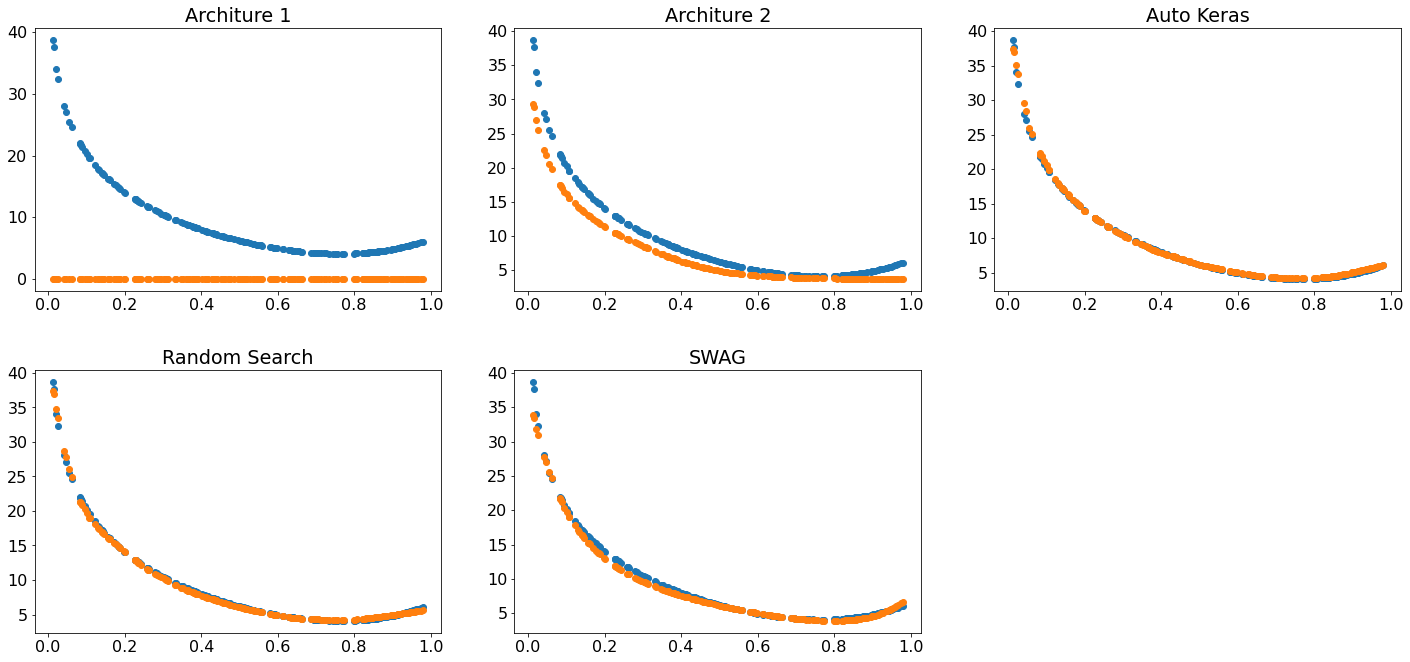

In [25]:
#Plots Shapes 
plot_shape(F_2_archicture_1,F_2_archicture_2,F_2_autokeras,F_2_Search,F_2_our_model,)


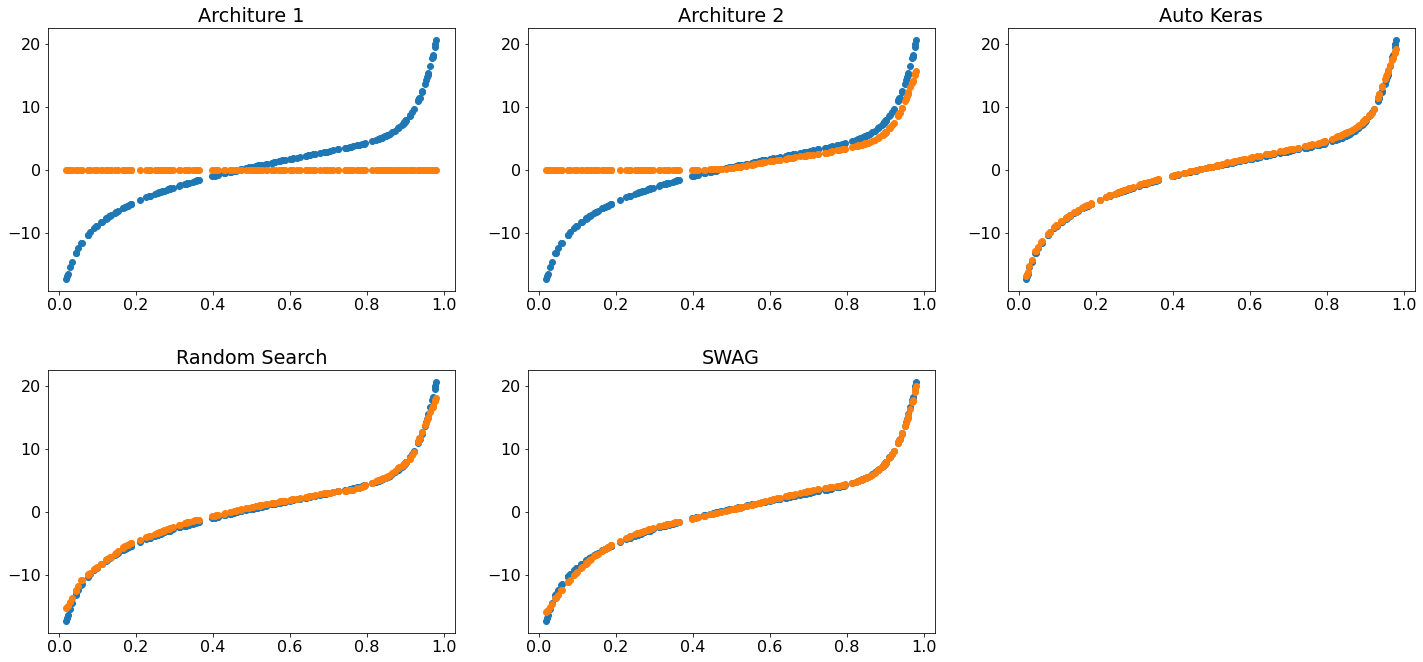

In [26]:
#Plots Shapes
plot_shape(F_3_archicture_1,F_3_archicture_2,F_3_autokeras,F_3_Search,F_3_our_model,)


In [27]:
import random
def rand_list():
  coefficient= [None for _ in range(8)]
  coefficient[0]= random.randint(-10, 10)
  coefficient[2]= random.randint(-10, 10)
  coefficient[4]= random.randint(-10, 10)
  coefficient[6]= random.randint(-10, 10)
  coefficient[1]= random.randint(1,50)
  coefficient[3]= random.randint(1,50)
  coefficient[5]= random.randint(1,50)
  coefficient[7]= random.randint(1,50)
  return coefficient


def fun_generator(co,x):
    return co[0]*power_(x, co[1])+co[2]*sigmoid_array(co[3]*x)+co[4]*exp_(co[5]*x*0.1)+co[6]*log_(co[7]*x)

Epoch 1/5
80/80 [==============================] - 1s 4ms/step - loss: 501.6465 - val_loss: 17.7163
Epoch 2/5
80/80 [==============================] - 0s 3ms/step - loss: 4.0768 - val_loss: 2.6140
Epoch 3/5
80/80 [==============================] - 0s 3ms/step - loss: 1.5177 - val_loss: 1.7570
Epoch 4/5
80/80 [==============================] - 0s 3ms/step - loss: 1.0228 - val_loss: 1.3400
Epoch 5/5
80/80 [==============================] - 0s 3ms/step - loss: 0.8512 - val_loss: 1.1781
Run Time : 1.877872


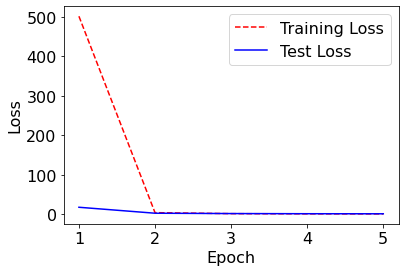

7/7 [==============================] - 0s 2ms/step
SWAG Validation loss :[0.8511504530906677]


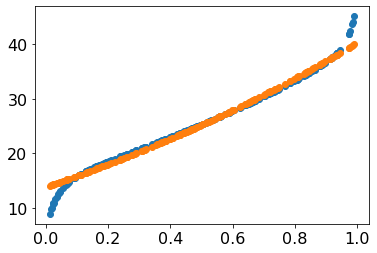

Epoch 1/5
25/25 [==============================] - 0s 3ms/step - loss: 732.9980 - mean_squared_error: 732.9980
Epoch 2/5
25/25 [==============================] - 0s 3ms/step - loss: 710.6613 - mean_squared_error: 710.6613
Epoch 3/5
25/25 [==============================] - 0s 3ms/step - loss: 652.9905 - mean_squared_error: 652.9905
Epoch 4/5
25/25 [==============================] - 0s 3ms/step - loss: 491.4143 - mean_squared_error: 491.4143
Epoch 5/5
25/25 [==============================] - 0s 3ms/step - loss: 212.3382 - mean_squared_error: 212.3382
Run Time : 20.917390


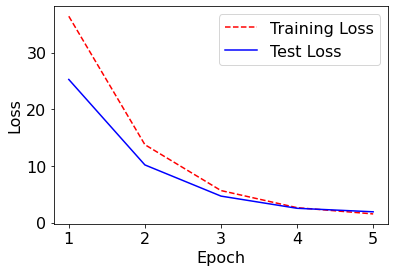

7/7 [==============================] - 0s 2ms/step
Autokeras Validation loss [1.5290340185165405]


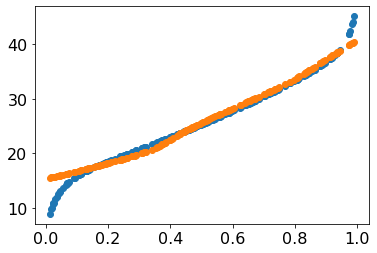

Epoch 1/5
80/80 [==============================] - 1s 4ms/step - loss: 43.7419 - val_loss: 40.4900
Epoch 2/5
80/80 [==============================] - 0s 3ms/step - loss: 36.6130 - val_loss: 39.8586
Epoch 3/5
80/80 [==============================] - 0s 3ms/step - loss: 35.5727 - val_loss: 39.1697
Epoch 4/5
80/80 [==============================] - 0s 3ms/step - loss: 34.3668 - val_loss: 38.8305
Epoch 5/5
80/80 [==============================] - 0s 3ms/step - loss: 33.4771 - val_loss: 38.9561
Run Time : 1.845271


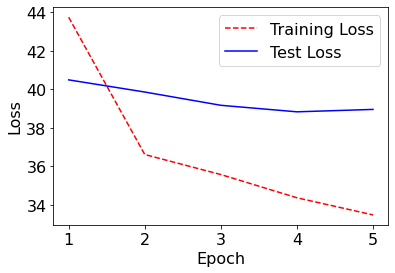

7/7 [==============================] - 0s 2ms/step
SWAG Validation loss :[33.477149963378906]


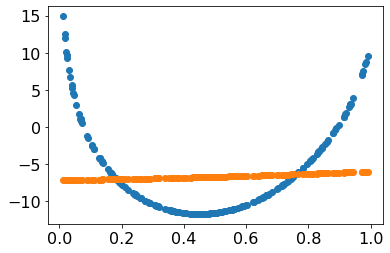

Epoch 1/5
25/25 [==============================] - 0s 3ms/step - loss: 43.2024 - mean_squared_error: 43.2024
Epoch 2/5
25/25 [==============================] - 0s 3ms/step - loss: 36.1472 - mean_squared_error: 36.1472
Epoch 3/5
25/25 [==============================] - 0s 3ms/step - loss: 35.6607 - mean_squared_error: 35.6607
Epoch 4/5
25/25 [==============================] - 0s 3ms/step - loss: 35.9940 - mean_squared_error: 35.9940
Epoch 5/5
25/25 [==============================] - 0s 3ms/step - loss: 34.3123 - mean_squared_error: 34.3123
Run Time : 18.903824


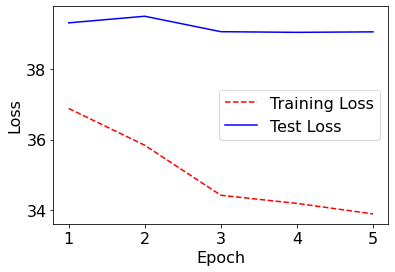

7/7 [==============================] - 0s 2ms/step
Autokeras Validation loss [33.8847541809082]


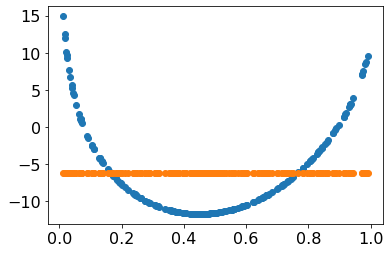

Epoch 1/5
80/80 [==============================] - 1s 4ms/step - loss: 53.6286 - val_loss: 5.5342
Epoch 2/5
80/80 [==============================] - 0s 3ms/step - loss: 3.9073 - val_loss: 5.4297
Epoch 3/5
80/80 [==============================] - 0s 3ms/step - loss: 3.8751 - val_loss: 5.3265
Epoch 4/5
80/80 [==============================] - 0s 3ms/step - loss: 3.8453 - val_loss: 5.3436
Epoch 5/5
80/80 [==============================] - 0s 3ms/step - loss: 3.8286 - val_loss: 5.2335
Run Time : 1.839002


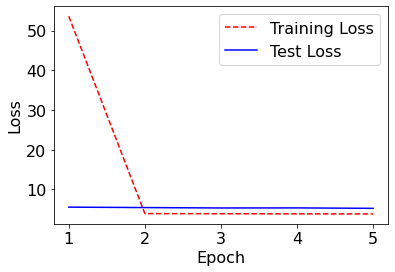

7/7 [==============================] - 0s 2ms/step
SWAG Validation loss :[3.8286101818084717]


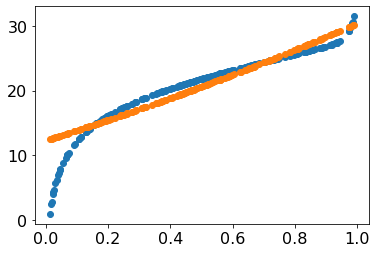

Epoch 1/5
25/25 [==============================] - 0s 3ms/step - loss: 424.1469 - mean_squared_error: 424.1469
Epoch 2/5
25/25 [==============================] - 0s 3ms/step - loss: 231.6424 - mean_squared_error: 231.6424
Epoch 3/5
25/25 [==============================] - 0s 3ms/step - loss: 58.3596 - mean_squared_error: 58.3596
Epoch 4/5
25/25 [==============================] - 0s 3ms/step - loss: 33.6963 - mean_squared_error: 33.6963
Epoch 5/5
25/25 [==============================] - 0s 3ms/step - loss: 22.4319 - mean_squared_error: 22.4319
Run Time : 20.725842


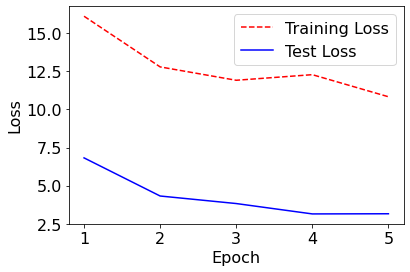

7/7 [==============================] - 0s 2ms/step
Autokeras Validation loss [10.833409309387207]


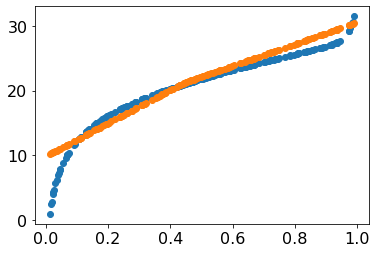

Epoch 1/5
80/80 [==============================] - 1s 4ms/step - loss: 832.6107 - val_loss: 346.8171
Epoch 2/5
80/80 [==============================] - 0s 3ms/step - loss: 279.1537 - val_loss: 201.3964
Epoch 3/5
80/80 [==============================] - 0s 3ms/step - loss: 128.6041 - val_loss: 63.2341
Epoch 4/5
80/80 [==============================] - 0s 3ms/step - loss: 32.1680 - val_loss: 15.9393
Epoch 5/5
80/80 [==============================] - 0s 3ms/step - loss: 8.3730 - val_loss: 8.9623
Run Time : 1.853637


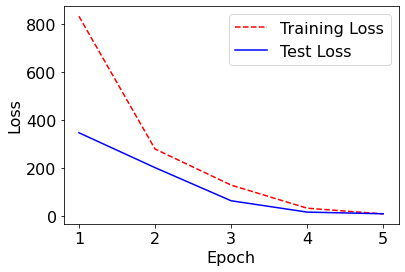

7/7 [==============================] - 0s 2ms/step
SWAG Validation loss :[8.372958183288574]


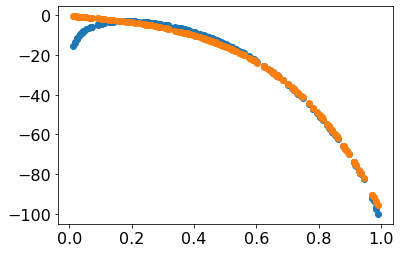

Epoch 1/5
25/25 [==============================] - 1s 4ms/step - loss: 1693.6155 - mean_squared_error: 1693.6155
Epoch 2/5
25/25 [==============================] - 0s 3ms/step - loss: 131.4755 - mean_squared_error: 131.4755
Epoch 3/5
25/25 [==============================] - 0s 3ms/step - loss: 49.3580 - mean_squared_error: 49.3580
Epoch 4/5
25/25 [==============================] - 0s 3ms/step - loss: 43.5377 - mean_squared_error: 43.5377
Epoch 5/5
25/25 [==============================] - 0s 4ms/step - loss: 26.2080 - mean_squared_error: 26.2080
Run Time : 22.593746


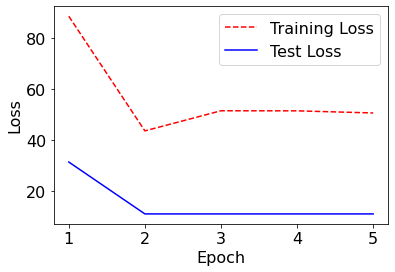

7/7 [==============================] - 0s 2ms/step
Autokeras Validation loss [50.64604568481445]


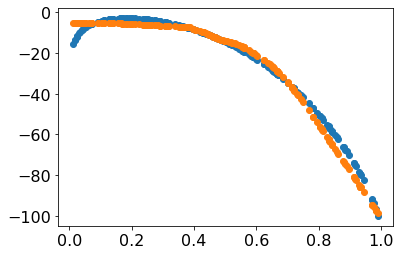

Epoch 1/5
80/80 [==============================] - 1s 4ms/step - loss: 1491.2891 - val_loss: 701.4084
Epoch 2/5
80/80 [==============================] - 0s 3ms/step - loss: 584.1287 - val_loss: 478.3586
Epoch 3/5
80/80 [==============================] - 0s 3ms/step - loss: 332.7203 - val_loss: 269.1207
Epoch 4/5
80/80 [==============================] - 0s 3ms/step - loss: 133.4252 - val_loss: 63.2950
Epoch 5/5
80/80 [==============================] - 0s 3ms/step - loss: 37.1564 - val_loss: 26.0976
Run Time : 1.851738


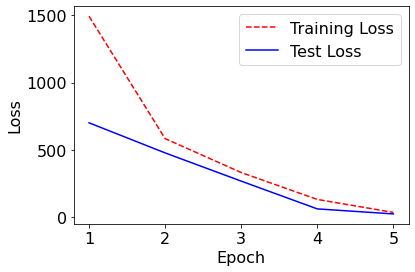

7/7 [==============================] - 0s 2ms/step
SWAG Validation loss :[37.15639114379883]


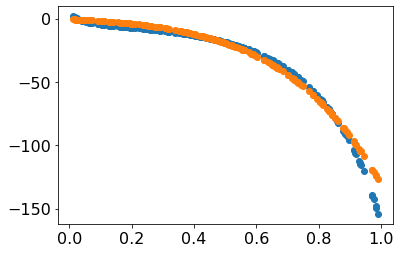

Epoch 1/5
25/25 [==============================] - 1s 3ms/step - loss: 2108.0803 - mean_squared_error: 2108.0803
Epoch 2/5
25/25 [==============================] - 0s 3ms/step - loss: 375.3682 - mean_squared_error: 375.3682
Epoch 3/5
25/25 [==============================] - 0s 3ms/step - loss: 183.5027 - mean_squared_error: 183.5027
Epoch 4/5
25/25 [==============================] - 0s 3ms/step - loss: 170.5214 - mean_squared_error: 170.5214
Epoch 5/5
25/25 [==============================] - 0s 3ms/step - loss: 139.9668 - mean_squared_error: 139.9668
Run Time : 22.223655


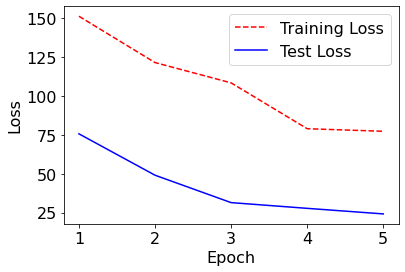

7/7 [==============================] - 0s 2ms/step
Autokeras Validation loss [77.2487564086914]


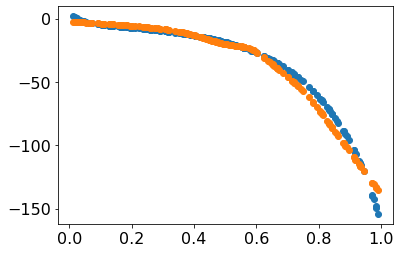

Epoch 1/5
80/80 [==============================] - 1s 4ms/step - loss: 336.9128 - val_loss: 99.9615
Epoch 2/5
80/80 [==============================] - 0s 3ms/step - loss: 82.2105 - val_loss: 59.1093
Epoch 3/5
80/80 [==============================] - 0s 3ms/step - loss: 41.2276 - val_loss: 24.4260
Epoch 4/5
80/80 [==============================] - 0s 3ms/step - loss: 16.8970 - val_loss: 10.8721
Epoch 5/5
80/80 [==============================] - 0s 3ms/step - loss: 9.3178 - val_loss: 13.6721
Run Time : 1.852052


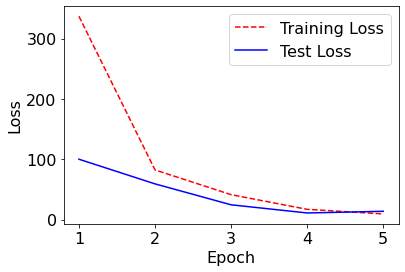

7/7 [==============================] - 0s 2ms/step
SWAG Validation loss :[9.317792892456055]


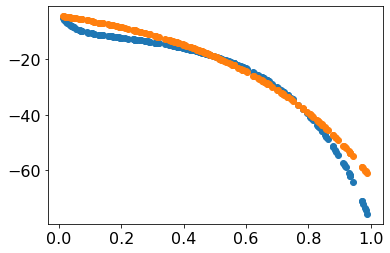

Epoch 1/5
25/25 [==============================] - 0s 3ms/step - loss: 810.6283 - mean_squared_error: 810.6283
Epoch 2/5
25/25 [==============================] - 0s 2ms/step - loss: 48.4310 - mean_squared_error: 48.4310
Epoch 3/5
25/25 [==============================] - 0s 2ms/step - loss: 17.7026 - mean_squared_error: 17.7026
Epoch 4/5
25/25 [==============================] - 0s 2ms/step - loss: 16.0453 - mean_squared_error: 16.0453
Epoch 5/5
25/25 [==============================] - 0s 2ms/step - loss: 14.6296 - mean_squared_error: 14.6296
Run Time : 19.792849


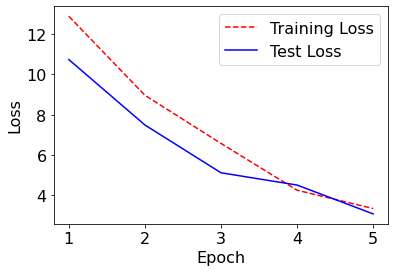

7/7 [==============================] - 0s 2ms/step
Autokeras Validation loss [3.3331375122070312]


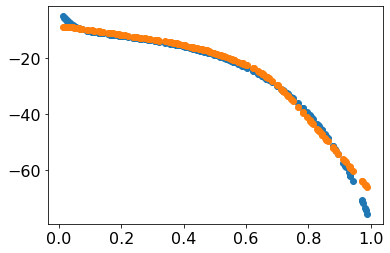

Epoch 1/5
80/80 [==============================] - 1s 4ms/step - loss: 290.4017 - val_loss: 90.8602
Epoch 2/5
80/80 [==============================] - 0s 3ms/step - loss: 64.3490 - val_loss: 37.8008
Epoch 3/5
80/80 [==============================] - 0s 3ms/step - loss: 17.8006 - val_loss: 4.7149
Epoch 4/5
80/80 [==============================] - 0s 3ms/step - loss: 1.3625 - val_loss: 0.1302
Epoch 5/5
80/80 [==============================] - 0s 3ms/step - loss: 0.0462 - val_loss: 0.0351
Run Time : 1.883546


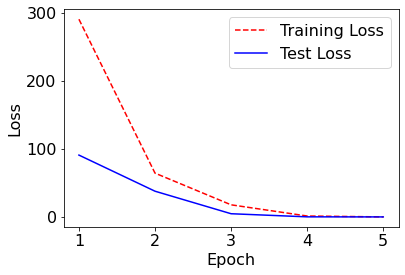

7/7 [==============================] - 0s 2ms/step
SWAG Validation loss :[0.04615744948387146]


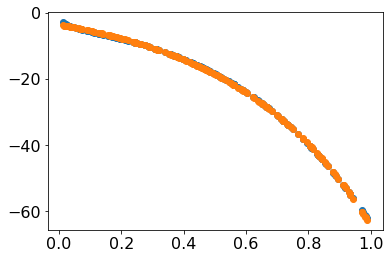

Epoch 1/5
25/25 [==============================] - 0s 3ms/step - loss: 756.5576 - mean_squared_error: 756.5576
Epoch 2/5
25/25 [==============================] - 0s 3ms/step - loss: 517.4560 - mean_squared_error: 517.4560
Epoch 3/5
25/25 [==============================] - 0s 3ms/step - loss: 158.6999 - mean_squared_error: 158.6999
Epoch 4/5
25/25 [==============================] - 0s 3ms/step - loss: 15.6814 - mean_squared_error: 15.6814
Epoch 5/5
25/25 [==============================] - 0s 3ms/step - loss: 10.4160 - mean_squared_error: 10.4160
Run Time : 20.540201


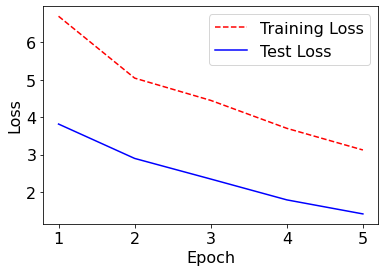

7/7 [==============================] - 0s 2ms/step
Autokeras Validation loss [3.121783494949341]


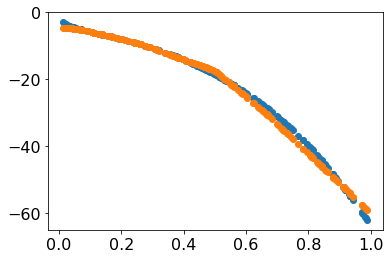

Epoch 1/5
80/80 [==============================] - 1s 4ms/step - loss: 256.8623 - val_loss: 22.7960
Epoch 2/5
80/80 [==============================] - 0s 3ms/step - loss: 14.9514 - val_loss: 9.5090
Epoch 3/5
80/80 [==============================] - 0s 3ms/step - loss: 5.6992 - val_loss: 2.6309
Epoch 4/5
80/80 [==============================] - 0s 3ms/step - loss: 1.5007 - val_loss: 0.9128
Epoch 5/5
80/80 [==============================] - 0s 3ms/step - loss: 0.7426 - val_loss: 0.7426
Run Time : 1.863820


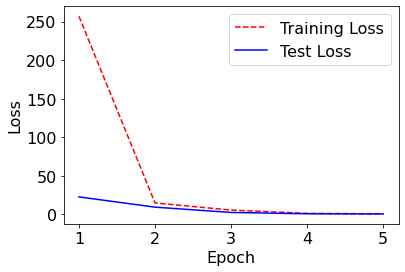

7/7 [==============================] - 0s 2ms/step
SWAG Validation loss :[0.7425978779792786]


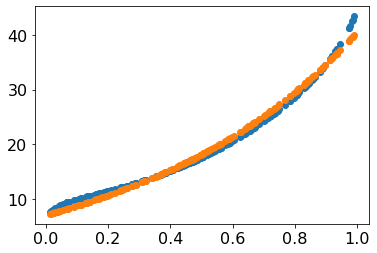

Epoch 1/5
25/25 [==============================] - 1s 3ms/step - loss: 117.6479 - mean_squared_error: 117.6479
Epoch 2/5
25/25 [==============================] - 0s 3ms/step - loss: 15.5574 - mean_squared_error: 15.5574
Epoch 3/5
25/25 [==============================] - 0s 3ms/step - loss: 11.5154 - mean_squared_error: 11.5154
Epoch 4/5
25/25 [==============================] - 0s 3ms/step - loss: 9.8252 - mean_squared_error: 9.8252
Epoch 5/5
25/25 [==============================] - 0s 3ms/step - loss: 8.4194 - mean_squared_error: 8.4194
Run Time : 21.134962


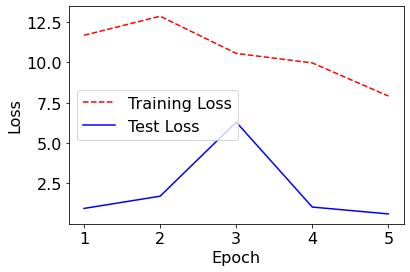

7/7 [==============================] - 0s 2ms/step
Autokeras Validation loss [7.909051895141602]


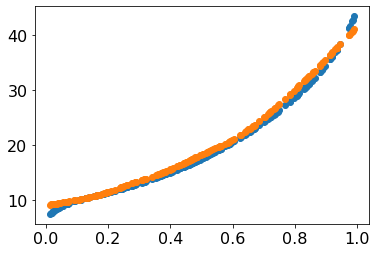

Epoch 1/5
80/80 [==============================] - 1s 4ms/step - loss: 74.1722 - val_loss: 9.9244
Epoch 2/5
80/80 [==============================] - 0s 3ms/step - loss: 6.1590 - val_loss: 8.0392
Epoch 3/5
80/80 [==============================] - 0s 3ms/step - loss: 5.1863 - val_loss: 7.0417
Epoch 4/5
80/80 [==============================] - 0s 3ms/step - loss: 4.7949 - val_loss: 6.5378
Epoch 5/5
80/80 [==============================] - 0s 3ms/step - loss: 4.6600 - val_loss: 6.3451
Run Time : 1.848192


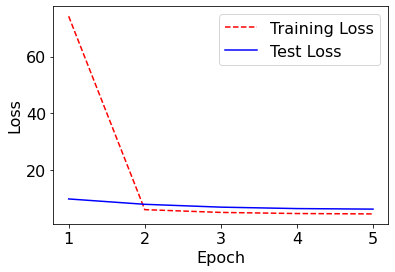

7/7 [==============================] - 0s 2ms/step
SWAG Validation loss :[4.659979343414307]


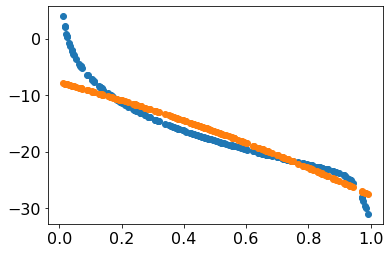

Epoch 1/5
25/25 [==============================] - 0s 3ms/step - loss: 324.8662 - mean_squared_error: 324.8662
Epoch 2/5
25/25 [==============================] - 0s 3ms/step - loss: 293.6393 - mean_squared_error: 293.6393
Epoch 3/5
25/25 [==============================] - 0s 3ms/step - loss: 232.5385 - mean_squared_error: 232.5385
Epoch 4/5
25/25 [==============================] - 0s 3ms/step - loss: 137.4306 - mean_squared_error: 137.4306
Epoch 5/5
25/25 [==============================] - 0s 3ms/step - loss: 49.2623 - mean_squared_error: 49.2623
Run Time : 21.129850


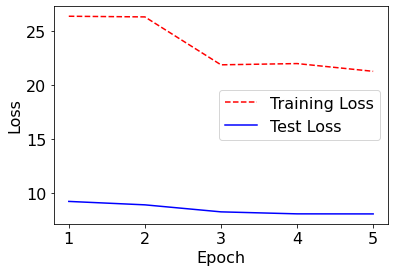

7/7 [==============================] - 0s 2ms/step
Autokeras Validation loss [21.270910263061523]


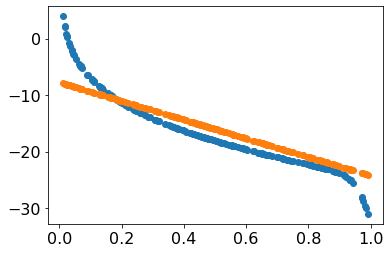

Epoch 1/5
80/80 [==============================] - 1s 4ms/step - loss: 4491.3462 - val_loss: 1839.6514
Epoch 2/5
80/80 [==============================] - 0s 3ms/step - loss: 1516.8801 - val_loss: 1104.1923
Epoch 3/5
80/80 [==============================] - 0s 3ms/step - loss: 808.3746 - val_loss: 474.5225
Epoch 4/5
80/80 [==============================] - 0s 3ms/step - loss: 284.7127 - val_loss: 136.2270
Epoch 5/5
80/80 [==============================] - 0s 3ms/step - loss: 72.1275 - val_loss: 29.0046
Run Time : 1.864293


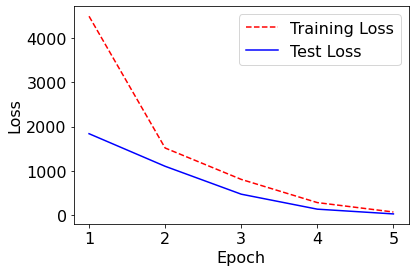

7/7 [==============================] - 0s 2ms/step
SWAG Validation loss :[72.12753295898438]


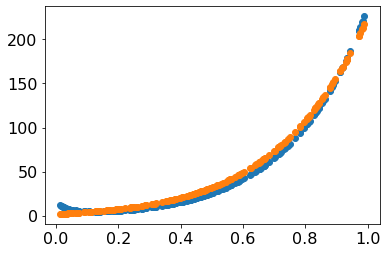

Epoch 1/5
25/25 [==============================] - 1s 3ms/step - loss: 6024.4136 - mean_squared_error: 6024.4136
Epoch 2/5
25/25 [==============================] - 0s 3ms/step - loss: 5289.9033 - mean_squared_error: 5289.9033
Epoch 3/5
25/25 [==============================] - 0s 3ms/step - loss: 3236.9697 - mean_squared_error: 3236.9697
Epoch 4/5
25/25 [==============================] - 0s 3ms/step - loss: 794.7341 - mean_squared_error: 794.7341
Epoch 5/5
25/25 [==============================] - 0s 3ms/step - loss: 436.5271 - mean_squared_error: 436.5271
Run Time : 21.909022


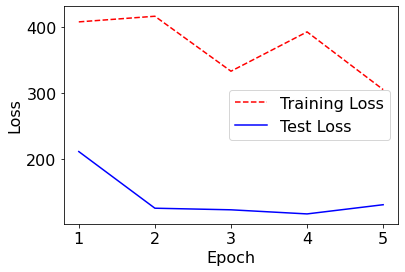

7/7 [==============================] - 0s 2ms/step
Autokeras Validation loss [305.1448059082031]


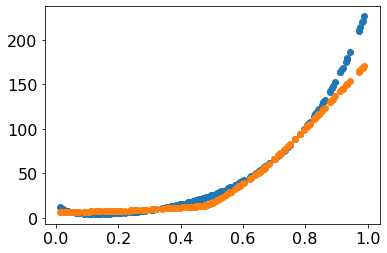

In [28]:
hidden_dimention = 50

for kk in range(10):  
  coefficient=rand_list()
  X1=X[:,0]
  Y1=fun_generator(coefficient,X1)
  X_train,X_test,Y_train,Y_test=train_test_split(X1,Y1,test_size=0.2,random_state=1234)

  Our_model=SWAG()
  coefficient=rand_list()
  start = timeit.default_timer()
  SWAG_history = Our_model.fit(X_train,Y_train,epochs=5,verbose=1,batch_size=10,validation_data=(X_test, Y_test)) 
  end = timeit.default_timer()
  print("Run Time : %f" % (end-start))
  plot_(SWAG_history)
  plt.scatter(X_test, Y_test)
  predict=Our_model.predict(X_test)
  plt.scatter(X_test, predict)
  print("SWAG Validation loss :"+str( SWAG_history.history['loss'][-1:]))
  # MSE = np.square(np.subtract(Y_train,predict)).mean()
  # print(MSE)
  plt.show()


  # Reshape data
  X_train = X_train.reshape(800, 1)
  Y_train = Y_train.reshape(800, 1)
  X_test = X_test.reshape(200, 1)
  Y_test = Y_test.reshape(200, 1)

  train_set = tf.data.Dataset.from_tensor_slices((X_train, Y_train))
  test_set = tf.data.Dataset.from_tensor_slices(
      (X_test, Y_test)
  )

  start = timeit.default_timer()


  clf = ak.StructuredDataRegressor(
      overwrite=True, max_trials=10
  ) 
  # Feed the tensorflow Dataset to the classifier.
  clf.fit(train_set, epochs=5,verbose=0)
  autokeras_model=clf.export_model()

  auto_history = autokeras_model.fit(X_train,Y_train,epochs=5,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
  end = timeit.default_timer()
  print("Run Time : %f" % (end-start))
  plot_(auto_history)
  plt.scatter(X_test, Y_test)
  predict=autokeras_model.predict(X_test)
  plt.scatter(X_test, predict)
  print("Autokeras Validation loss "+str( auto_history.history['loss'][-1:]))
  # MSE = np.square(np.subtract(Y_train,predict)).mean()
  # print(MSE)
  plt.show()

In [29]:
batch_size = 128
num_classes = 10
epochs = 4

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train+10
x_test = x_test+10

x_train /= 300
x_test /= 300
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

number_train=60000 
number_test=10000

x_train=x_train[0:number_train,:]
x_test=x_test[0:number_test,:]

y_train=y_train[0:number_train]
y_test=y_test[0:number_test]

11490434/11490434 [==============================] - 0s 0us/step
60000 train samples
10000 test samples


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 784)]        0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 500)          392500      ['input_2[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 500)          392500      ['input_2[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 1000)         0           ['dense_3[0][0]',                
                                                                  'dense_4[0][0]']          

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/4
469/469 [==============================] - 2s 4ms/step - loss: 0.0546 - accuracy: 0.9027 - val_loss: 0.0173 - val_accuracy: 0.9618
Epoch 2/4
469/469 [==============================] - 2s 3ms/step - loss: 0.0152 - accuracy: 0.9674 - val_loss: 0.0133 - val_accuracy: 0.9738
Epoch 3/4
469/469 [==============================] - 2s 3ms/step - loss: 0.0117 - accuracy: 0.9779 - val_loss: 0.0116 - val_accuracy: 0.9751
Epoch 4/4
469/469 [==============================] - 2s 3ms/step - loss: 0.0099 - accuracy: 0.9836 - val_loss: 0.0102 - val_accuracy: 0.9801
7.456645950999928
Test loss: 0.010150321759283543
Test accuracy: 0.9800999760627747


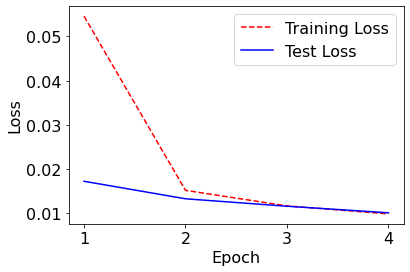

In [30]:
#Our Model optimize version
hidden_dimention=500
model = Sequential()

in_ = Input(shape=(784,))
Layer_1_X_1=Dense(hidden_dimention, activation='X_1')(in_)
################################################################
Layer_1_X_2=Dense(hidden_dimention, activation='X_2')(in_)
###############################################################
Concatenate_First_Layer = concatenate([Layer_1_X_1,Layer_1_X_2])

Layer__X_3_X_4=Dense(hidden_dimention, activation='X_2_')(Concatenate_First_Layer)
###############################################################


Concatenate_second_Layer = concatenate([Layer_1_X_1,Layer_1_X_2,Concatenate_First_Layer,Layer__X_3_X_4])

Out_put_first_layer=Dense(hidden_dimention, activation='linear')(Concatenate_second_Layer)


Out_put=Dense(10, activation='linear')(Out_put_first_layer)
model = Model(in_ , Out_put)
model.summary()
model.compile(loss='mean_squared_error', optimizer='adam')



optimizer =Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(loss='mean_squared_error', optimizer=optimizer,metrics=['accuracy'])
# Image(filename='model_2_layers.png')

start = timeit.default_timer()
history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
end = timeit.default_timer()
print(end-start)


score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
plot_(history)

In [ ]:
train_set = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_set = tf.data.Dataset.from_tensor_slices(
    (x_test, y_test)
)

start = timeit.default_timer()


clf = ak.StructuredDataRegressor(
    overwrite=True, max_trials=3
) 
# Feed the tensorflow Dataset to the classifier.
clf.fit(train_set, epochs=5,verbose=0)
autokeras_model=clf.export_model()

auto_history = autokeras_model.fit(x_train,y_train,epochs=5,verbose=0,batch_size=10,validation_data=(x_test, y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))